train_score:  0.8664614200500289
test_score:  0.8615384615384616


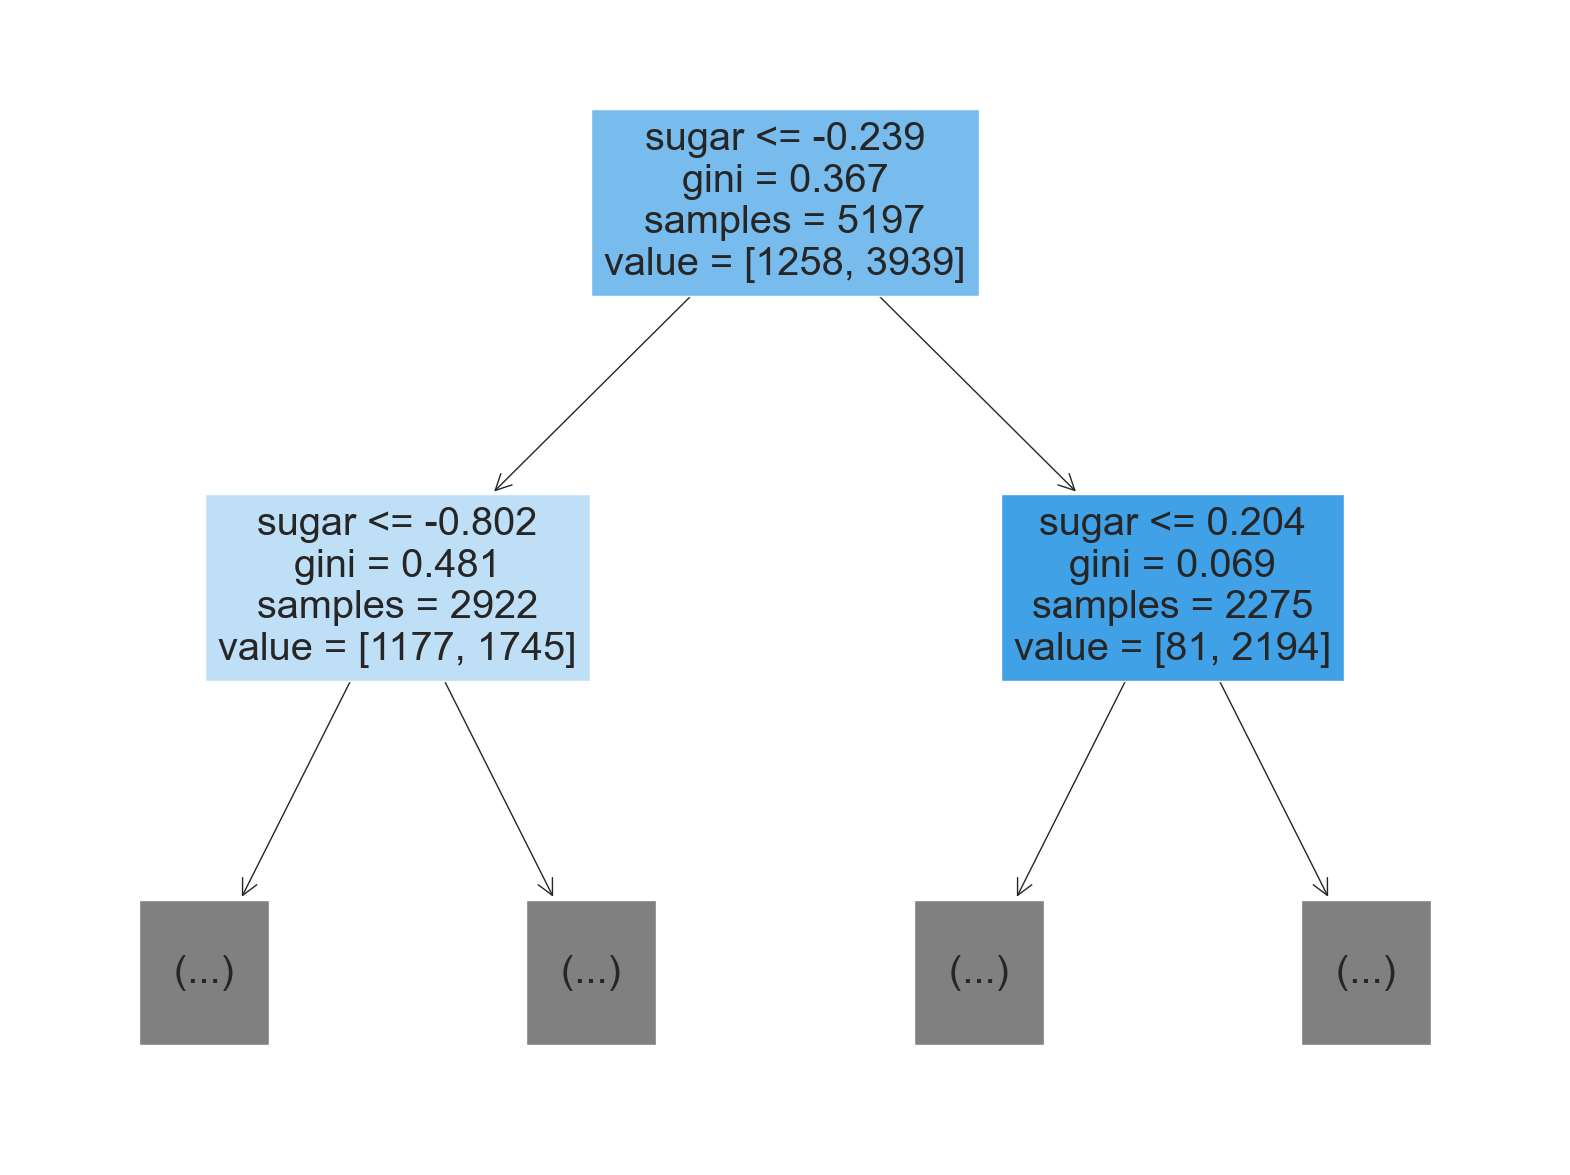

In [68]:
# 문제 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas  as pd
import matplotlib.pyplot as plt

wine = pd.read_csv('wine.csv')
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(train_scaled, train_target)

plt.figure(figsize=(20, 15))
plot_tree(dt, max_depth=1, filled=True,
    feature_names=['alcohol', 'sugar', 'pH'])
dt = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_leaf=10)
dt.fit(train_scaled, train_target)

print("train_score: ",dt.score(train_scaled, train_target))
print("test_score: ",dt.score(test_scaled, test_target))

In [69]:
# 문제 2
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import plotly.graph_objects as go

def make_daegu(N=1000, rseed=42) : 
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'DAEGU', va = 'center',
            ha = 'center', weight = 'bold', size = 85)
    fig.savefig('daegu.png')
    plt.close(fig)
    from matplotlib.image import imread
    data = imread('daegu.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4* N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]
X = make_daegu(1000)

def random_projection(X, dimension=3, rseed=42) :
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X1 = random_projection(X, 3)
X1.shape


fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X1[:,0], y=X1[:,1], z = X1[:,2],
    opacity=0.3, mode = 'markers',
    marker = dict(size=5, color=X1[:,2], colorscale='Viridis')))
fig.update_layout(height = 800, width = 800)



def make_daegu_s_curve(X) : 
    t = (X[:,0] -2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_daegu_s_curve(X)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=XS[:,0], y=XS[:,1], z=XS[:,2],
    opacity=0.8, mode = 'markers',
    marker=dict(size=5, color=XS[:,2], colorscale='Viridis')))
fig.update_layout(height=500)
fig.show()

t_sne = TSNE(n_components=2, perplexity=40)
sne_out = t_sne.fit_transform(XS)
fig = go.Figure()
fig.add_trace(go.Scatter(x=sne_out[:,0], y=sne_out[:,1],
    mode='markers',
    marker=dict(size=5, color=sne_out[:,0], colorscale='Viridis')))
fig.update_layout(height=400, width=400)
fig.show()

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [70]:
# 문제 3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dat_wdbc = pd.read_csv('./wdbc.csv', header=None)

X = dat_wdbc.loc[:, 2:].values
y = dat_wdbc.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M', 'B'])

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2,
        stratify=y, random_state=1)


pipe_lr = make_pipeline(StandardScaler(),
    PCA(n_components=10),
    LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_train_pred = pipe_lr.predict(X_train)
y_test_pred = pipe_lr.predict(X_test)

print('Train_score: ', pipe_lr.score(X_train, y_train))
print('Test_score: ', pipe_lr.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_test_pred))

Train_score:  0.9912087912087912
Test_score:  0.9824561403508771
[[71  1]
 [ 1 41]]


In [127]:
# 문제 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dat_wine = pd.read_csv('./wine_new.csv', header=None)

X = dat_wine.loc[:, 1:].values
y = dat_wine.loc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4,
        stratify=y, random_state=42)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

lr = LogisticRegression()
lpca = PCA(n_components=4)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
y_train_pre = lr.predict(X_train_pca)
y_test_pre = lr.predict (X_test_pca)

print('Train_score: ', metrics.accuracy_score(y_train, y_train_pre))
print('Test_score: ', metrics.accuracy_score(y_test, y_test_pre))
print(metrics.confusion_matrix(y_test, y_test_pre))

Train_score:  0.9905660377358491
Test_score:  1.0
[[24  0  0]
 [ 0 29  0]
 [ 0  0 19]]


In [73]:
# 문제 5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as  np

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house = pd.read_csv('./house.csv', usecols = col_names)
house_dat = [0.016815,9,4.69, 0, 0.5035, 6.498, 72.05, 4.52855, 2, 269, 16.55, 396.9, 7.06]

col1=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
col2=['ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'MEDV']
a=house[col1].values
cm1 = np.corrcoef(house[col1].values.T)
cm2 = np.corrcoef(house[col2].values.T)

house['LLSTAT']=np.log(house['LSTAT'])
house['LINDUS']=np.log(house['INDUS'])

y = house['MEDV'].values
house1=house.drop(['LSTAT', 'INDUS', 'MEDV'], axis=1)
X = house1.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state=1)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

rans = RANSACRegressor(max_trials=100, min_samples=45,
    loss='absolute_error', residual_threshold=5.0, random_state=1)
rans.fit(X_train, y_train)
y_train_pred=rans.predict(X_train)
y_test_pred=rans.predict(X_test)

print('train_MSE: ', mean_squared_error(y_train, y_train_pred))
print('test_MSE: ', mean_squared_error(y_test, y_test_pred))

train_MSE:  26.95918067741638
test_MSE:  22.29619990134768


In [91]:
# 문제 6
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

import plotly.express as px
fig=px.scatter(x=X[:,0], y=X[:,1])
fig.update_layout(width=500, height=380)
fig.show()

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_db = db.fit_predict(X)
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_db==0,0], y=X[y_db==0,1],
    mode='markers', name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_db==1,0], y=X[y_db==1,1],
    mode='markers', name='cluster2'))
fig.add_trace(go.Scatter(x=X[y_db==-1,0], y=X[y_db==-1,1],
    mode='markers', name='noise'))
fig.update_layout(width=500, height=380)
fig.show()

In [100]:
# 문제 7
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
digits


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [123]:
# 문제 8
from sklearn import datasets
X, y = datasets.make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=0)

import plotly.express as px
fig=px.scatter(x=X[:,0], y=X[:,1])
fig.update_layout(width=500, height=380)
fig.show()

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_db = db.fit_predict(X)
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_db==-1,0], y=X[y_db==-1,1],
    mode='markers', name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_db==0,0], y=X[y_db==0,1],
    mode='markers', name='cluster2'))
fig.update_layout(width=500, height=380)
fig.show()